In [47]:
# Set-Up Imports
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
from functools import reduce

In [48]:
# Set to desired file and read it
cosmetics_csv = Path("..","datasets", "cscpopendata.csv")
cosmetics_df = pd.read_csv(cosmetics_csv)

In [49]:
# Show Brand and Ingredients in list
toxicchemical = cosmetics_df[['BrandName', 'ChemicalName']]
toxicchemical

,BrandName,ChemicalName
0,AVON,Titanium dioxide
1,Glover's,Distillates (coal tar)
2,Glover's,Estragole
3,AVON,Titanium dioxide
4,AVON,Titanium dioxide
...,...,...
114630,YANBAL,Titanium dioxide
114631,YANBAL,Titanium dioxide
114632,YANBAL,Titanium dioxide
114633,YANBAL,Titanium dioxide


In [50]:
# Drop any values that are empty
toxicclean = toxicchemical.dropna(axis = 0)
toxicclean

,BrandName,ChemicalName
0,AVON,Titanium dioxide
1,Glover's,Distillates (coal tar)
2,Glover's,Estragole
3,AVON,Titanium dioxide
4,AVON,Titanium dioxide
...,...,...
114630,YANBAL,Titanium dioxide
114631,YANBAL,Titanium dioxide
114632,YANBAL,Titanium dioxide
114633,YANBAL,Titanium dioxide


In [51]:
# List of all Chemical Names 
toxic_names = toxicclean['ChemicalName'].value_counts()
toxic_names.head()

Titanium dioxide                                                                                       93363
Silica, crystalline (airborne particles of respirable size)                                             2817
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2152
Mica                                                                                                    1918
Butylated hydroxyanisole                                                                                1888
Name: ChemicalName, dtype: int64

In [52]:
chemicalscount = toxic_names.nlargest(n=5)
chemicalcount = chemicalscount.reset_index(name='counts')
chemicalcount

,index,counts
0,Titanium dioxide,93363
1,"Silica, crystalline (airborne particles of res...",2817
2,"Retinol/retinyl esters, when in daily dosages ...",2152
3,Mica,1918
4,Butylated hydroxyanisole,1888


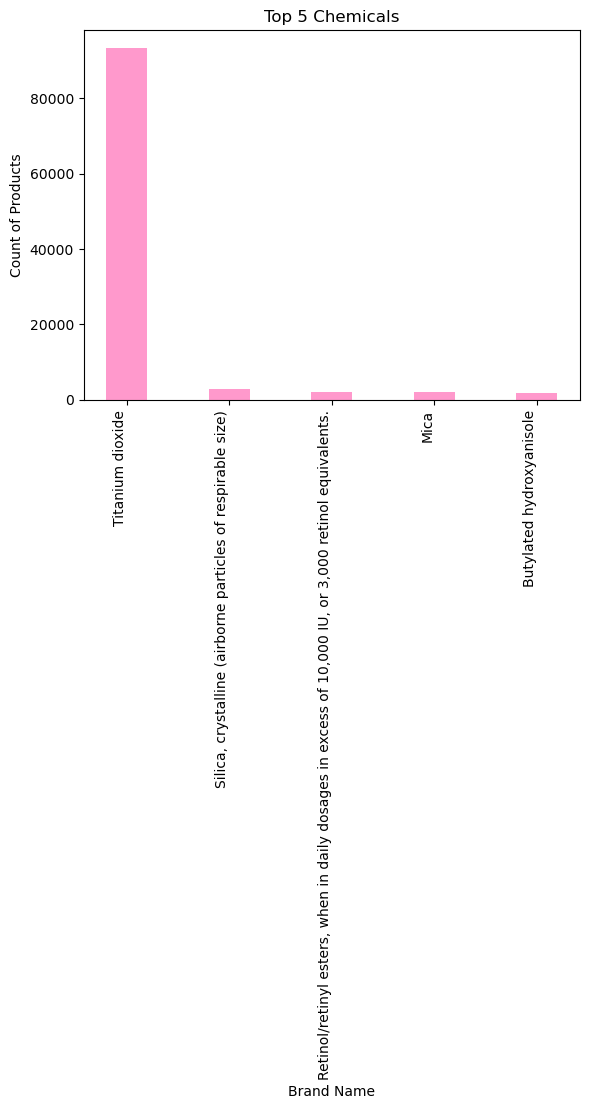

In [53]:
plt.bar(chemicalcount['index'], chemicalcount['counts'],
        width = 0.4, color='#FF99CC')
plt.xticks(ha='right', fontsize=10, rotation='vertical') 
plt.xlabel("Brand Name")
plt.ylabel("Count of Products")
plt.title("Top 5 Chemicals")
plt.savefig("../top5chemicals.png")
plt.show()